In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
time_series = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0]) # сразу прводим столбец date к формату даты
time_series.sample(5)

,date,value
1074,2019-04-18,86821
153,2016-10-09,23573
853,2018-09-09,56988
854,2018-09-10,79179
1158,2019-07-11,111793


In [ ]:
# 2 способ перевод столбца в формат даты - time_series['date'] = time_series['date'].astype('datetime64[ns]')
# 3 способ перевод столбца в формат даты - pd.to_datetime(time_series['date'])

In [3]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [4]:
time_series.reset_index().head()

,index,date,value
0,0,2016-05-09,1201
1,1,2016-05-10,2329
2,2,2016-05-11,1716
3,3,2016-05-12,10539
4,4,2016-05-13,6933


In [5]:
# добавляем колонки год и месяц
time_series['YEAR'] = time_series['date'].dt.year
time_series['MONTH'] = time_series['date'].dt.month
time_series['DAY'] = time_series['date'].dt.day

In [6]:
# обрезаем по перцентилям меньше 2.5 и 97.5
new_time_series = time_series[
    (time_series['value'] >= time_series['value'].quantile(0.025)) &
    (time_series['value'] <= time_series['value'].quantile(0.975))
    ]

In [7]:
new_time_series.head()

,date,value,YEAR,MONTH,DAY
10,2016-05-19,19736,2016,5,19
17,2016-05-26,18060,2016,5,26
18,2016-05-27,19997,2016,5,27
19,2016-05-28,19044,2016,5,28
20,2016-05-29,20325,2016,5,29


Text(0, 0.5, 'Page Value')

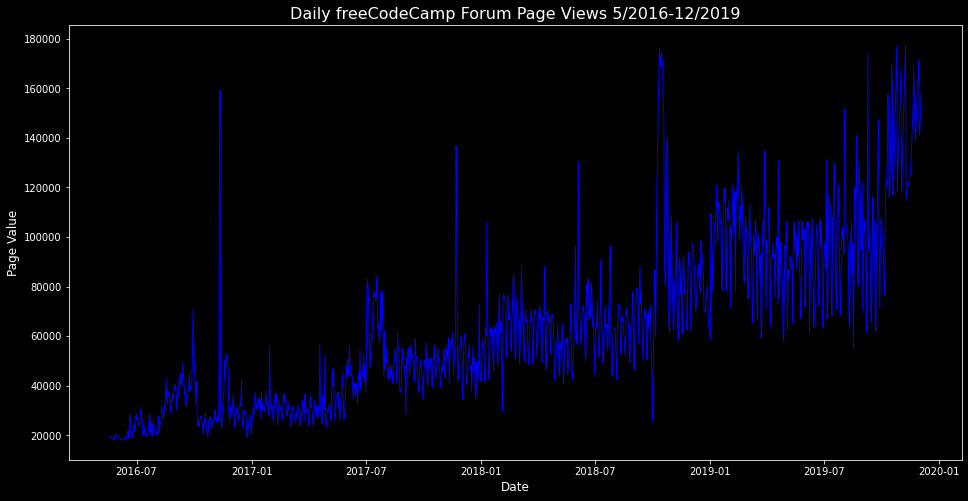

In [16]:
x = new_time_series.date
y = new_time_series.value
plt.figure(figsize=(16, 8))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize=16)
plt.plot(x, y, color='blue', linewidth=0.9)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Page Value', fontsize=12)

In [ ]:
#df["month"]= df.index.month
#df["year"]= df.index.year
#df= df.groupby(["year","month"])["value"].mean().unstack()

In [14]:
val = new_time_series.groupby(['YEAR','MONTH'])['value'].mean().unstack()

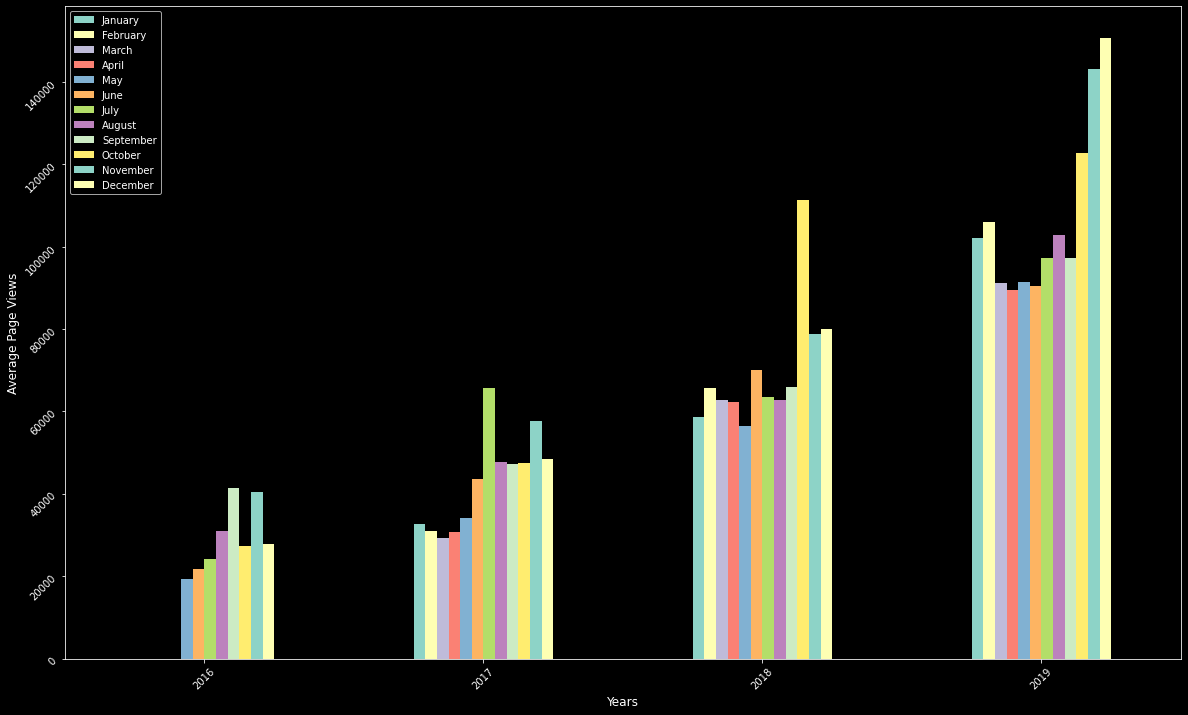

In [10]:
val.plot.bar(figsize=(20, 12))

plt.xlabel('Years', fontsize=12)
plt.ylabel('Average Page Views', fontsize=12)
plt.xlabel('Years', fontsize= 12)
plt.ylabel('Average Page Views', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

Text(0, 0.5, 'Page Views')

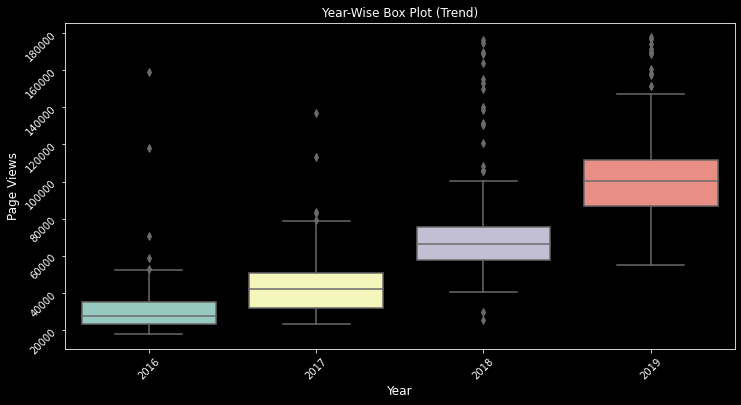

In [11]:
fig, (ax1) = plt.subplots(1)
fig.set_figwidth(12)
fig.set_figheight(6)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

ax1 = sns.boxplot(x=new_time_series['YEAR'], y=new_time_series['value'], ax=ax1)
ax1.set_title('Year-Wise Box Plot (Trend)', fontsize=12) 
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Page Views', fontsize=12)

Text(0, 0.5, 'Page Views')

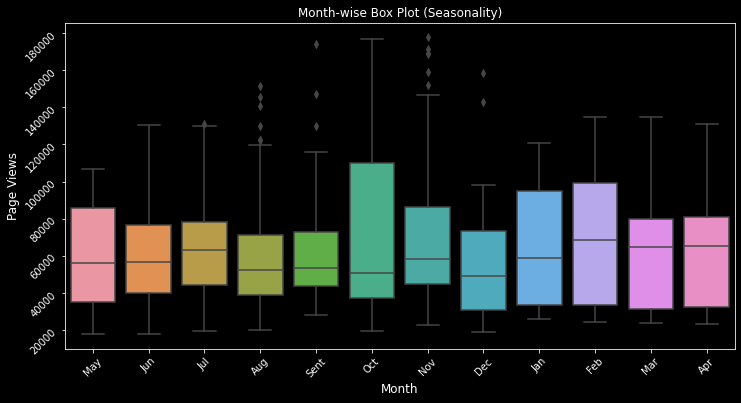

In [12]:

new_time_series['month'] = new_time_series["date"].dt.month
month = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sent', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
new_time_series['month'] = new_time_series['month'].map(month)

fig, (ax2) = plt.subplots(1)
fig.set_figwidth(12)
fig.set_figheight(6)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

ax2 = sns.boxplot(x=new_time_series['month'], y=new_time_series['value'], ax=ax2)
ax2.set_title('Month-wise Box Plot (Seasonality)', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Page Views', fontsize=12)

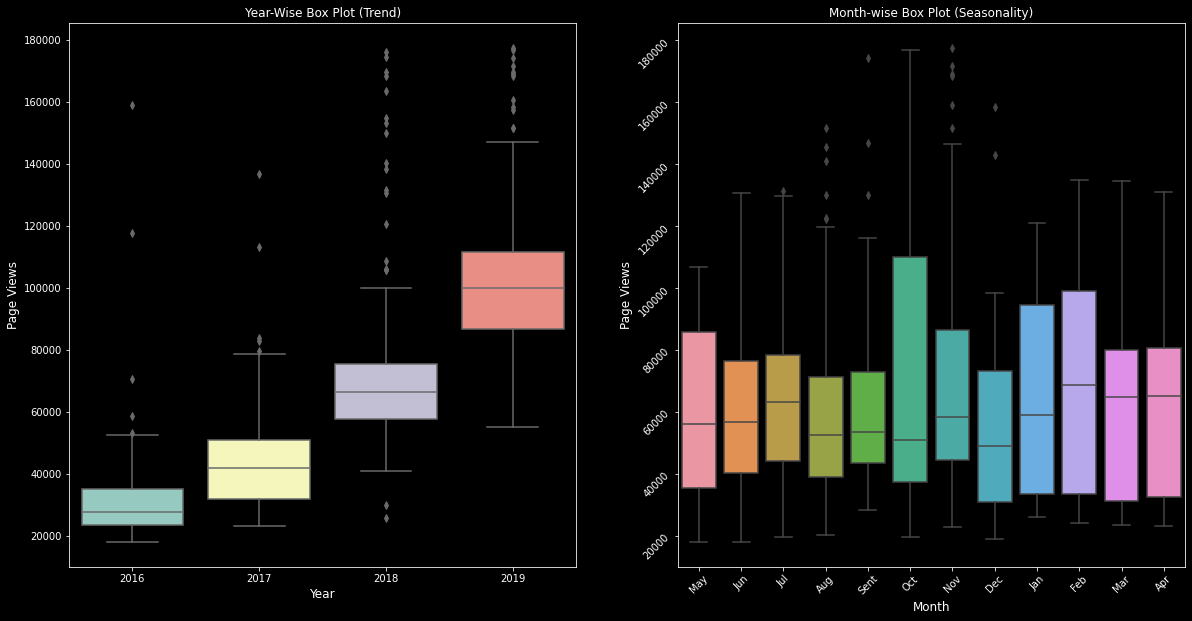

In [13]:
new_time_series['month'] = new_time_series["date"].dt.month
month = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sent', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
new_time_series['month'] = new_time_series['month'].map(month)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

ax1 = sns.boxplot(x=new_time_series['YEAR'], y=new_time_series['value'], ax=ax1)
ax1.set_title('Year-Wise Box Plot (Trend)', fontsize=12) 
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Page Views', fontsize=12)


ax2 = sns.boxplot(x=new_time_series['month'], y=new_time_series['value'], ax=ax2)
ax2.set_title('Month-wise Box Plot (Seasonality)', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Page Views', fontsize=12)

plt.show()